In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
df = pd.read_csv('04-data/preprocessed_app_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22010 entries, 0 to 22009
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     22010 non-null  object 
 1   description               22010 non-null  object 
 2   summary                   22009 non-null  object 
 3   installs                  22010 non-null  object 
 4   minInstalls               22010 non-null  float64
 5   score                     22010 non-null  float64
 6   ratings                   22010 non-null  float64
 7   reviews                   22010 non-null  float64
 8   histogram                 22010 non-null  object 
 9   price                     22010 non-null  float64
 10  free                      22010 non-null  int64  
 11  currency                  22010 non-null  object 
 12  sale                      22010 non-null  bool   
 13  offersIAP                 22010 non-null  bool   
 14  inAppP

In [3]:
df1 = df[['title','minInstalls','reviews','ratings','free','containsAds','genre','editorsChoice','contentRating',
          'year','top_developer','has_video','installs_day','updated_days','score']]

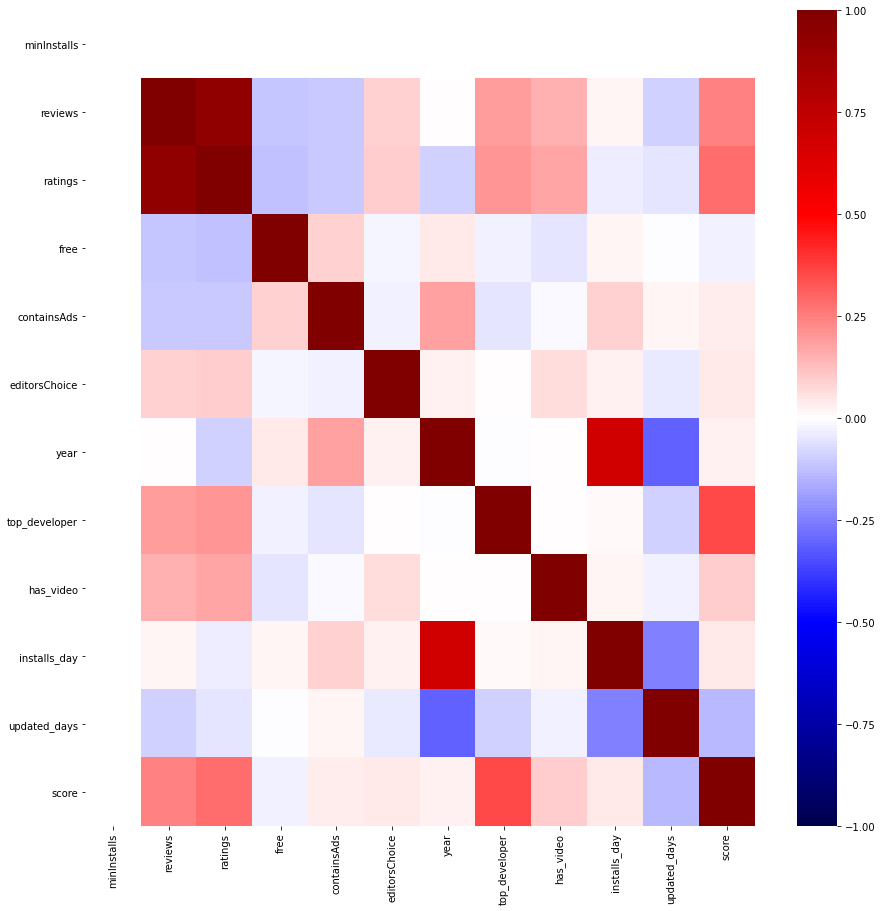

In [4]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1.corr(), cmap="seismic", vmin=-1, vmax=1, ax=ax);

#### Observations

- Fairly strong correlation between minInstalls and number of ratings. Drop minInstalls from the regression analysis, given it is bucketed. 
- Strong correlations between year, days since last update and also installs per day. Remove one at a time during regression analyis

<ipython-input-5-2159c77aeb6c>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df1[['minInstalls','ratings','year','installs_day','updated_days','score']], ax=ax);
/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 1000000.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 1000000.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 1000000.0 results in singular transformations; automatica

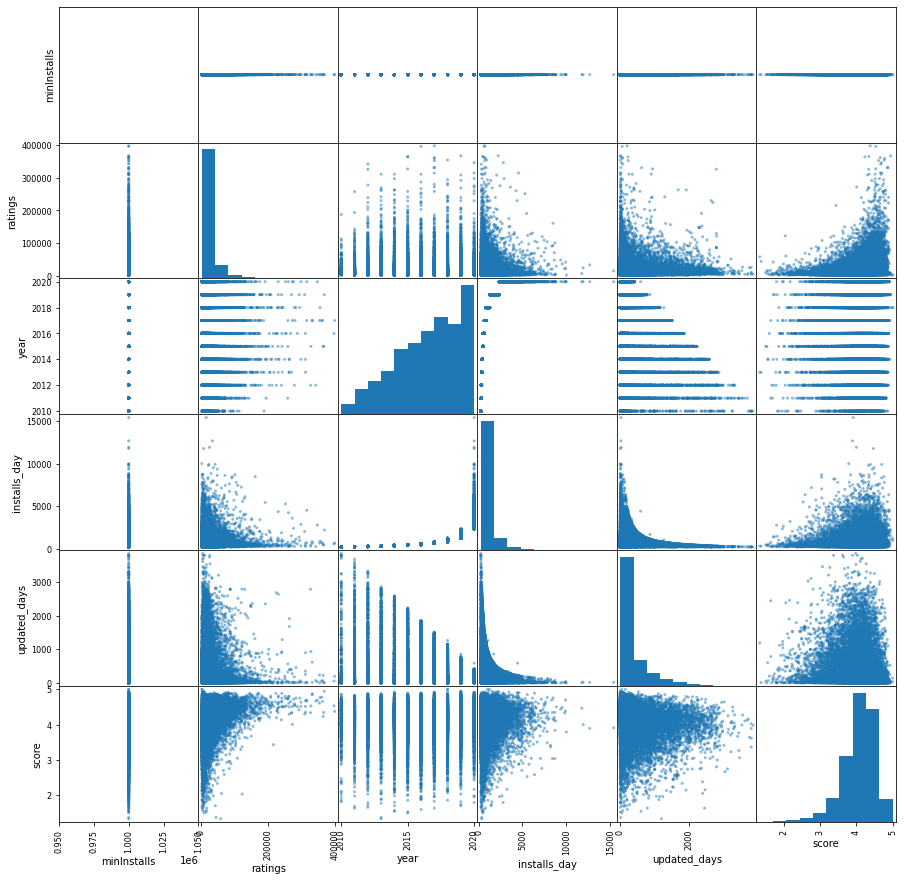

In [5]:
fig, ax = plt.subplots(figsize=(15, 15))
pd.plotting.scatter_matrix(df1[['minInstalls','ratings','year','installs_day','updated_days','score']], ax=ax);

#### Observations

Score (the target) has a left skew, which is further demonstrated in the images below

In [6]:
print('Average app score overall: {:.3f}'.format(df1['score'].mean()))
print('Median app score overall: {:.3f}'.format(df1['score'].median()))

Average app score overall: 4.067
Median app score overall: 4.133


/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


- Total number of ratings: 22010
- Mean of distribution of rating : 4.0674475002180746
- Standard deviation: 0.4494931088519719


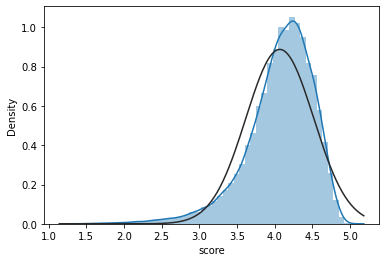

In [7]:
sns.distplot(df1['score'],fit=stats.norm)
print('- Total number of ratings:', len(df1['score']))
print('- Mean of distribution of rating :', np.mean(df1['score']))
print('- Standard deviation:', np.std(df1['score']))

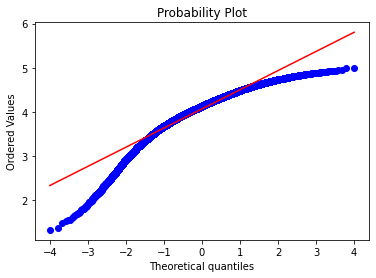

In [8]:
fig = plt.figure() 
prob = stats.probplot(df['score'], plot=plt)

### By content rating

In [9]:
df1.groupby('contentRating')['contentRating'].count()

contentRating
Everyone        16488
Everyone 10+     1084
Mature 17+        894
Teen             3544
Name: contentRating, dtype: int64

In [10]:
df1.groupby('contentRating')['score'].mean()

contentRating
Everyone        4.070828
Everyone 10+    4.104545
Mature 17+      4.011252
Teen            4.054549
Name: score, dtype: float64

### By app genre

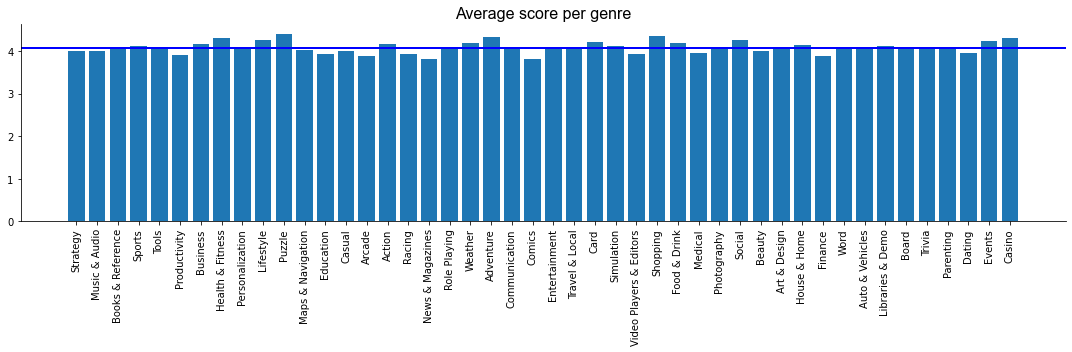

In [11]:
app_genre_score = df.groupby('genre')['score'].mean()
genre_list = df1['genre'].unique()
mean_score = df1['score'].mean()

plt.figure(figsize=[15,5])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(mean_score, label= 'Mean score', color = 'blue', linewidth=2)
plt.bar(genre_list,app_genre_score)   
plt.xticks(genre_list,rotation=90)
plt.title('Average score per genre',family='arial',fontsize=16)
plt.tight_layout()

plt.show;

Does not appear to be significant differences in mean user score across genres

In [12]:
df1.groupby('genre')['genre'].count()

genre
Action                     1066
Adventure                   575
Arcade                      741
Art & Design                144
Auto & Vehicles              89
Beauty                       62
Board                       229
Books & Reference           354
Business                    206
Card                        225
Casino                      154
Casual                     1187
Comics                       63
Communication               399
Dating                       75
Education                  1230
Entertainment              1288
Events                       10
Finance                     408
Food & Drink                106
Health & Fitness            418
House & Home                 44
Libraries & Demo             29
Lifestyle                   579
Maps & Navigation           190
Medical                      73
Music & Audio               734
News & Magazines            171
Parenting                    52
Personalization            1136
Photography                1033
Pr

## By release year

In [13]:
df.groupby('year')['year'].count()

year
2010     340
2011     855
2012    1139
2013    1474
2014    2228
2015    2406
2016    2813
2017    3309
2018    3061
2019    2976
2020    1409
Name: year, dtype: int64

In [14]:
df.groupby('year')['score'].mean()

year
2010    4.023601
2011    4.036914
2012    4.058111
2013    4.090433
2014    4.094633
2015    4.075822
2016    4.028286
2017    4.016964
2018    4.062718
2019    4.115331
2020    4.128650
Name: score, dtype: float64

### By whether the app contains ads

In [15]:
df1.groupby('containsAds')['score'].mean()

containsAds
0    4.034328
1    4.075148
Name: score, dtype: float64

Does not appear to be a large difference in apps that do / don't contain ads

### By whether the app is an Editor's Choice

In [16]:
df1.groupby('editorsChoice')['editorsChoice'].count()

editorsChoice
0    21863
1      147
Name: editorsChoice, dtype: int64

In [17]:
df1.groupby('editorsChoice')['score'].mean()

editorsChoice
0    4.065851
1    4.304856
Name: score, dtype: float64

Apps marked as 'Editor's Choice' appear to have higher average score. Makes sense given likely to promote higher quality apps

### By whether the app is free

In [18]:
df1.groupby('free')['free'].count()

free
0       80
1    21930
Name: free, dtype: int64

In [19]:
df1.groupby('free')['score'].mean()

free
0    4.244858
1    4.066800
Name: score, dtype: float64

Paid-for apps appear to have a higher average score. This makes sense given you expect highr quality when you are paying for access

### By top developer in terms of average app score

In [20]:
df1.groupby('top_developer')['score'].mean()

top_developer
0    4.027618
1    4.699900
Name: score, dtype: float64

### By whether the app posting has a video

In [21]:
df1.groupby('has_video')['has_video'].count()

has_video
0    14669
1     7341
Name: has_video, dtype: int64

In [22]:
df1.groupby('has_video')['score'].mean()

has_video
0    4.036151
1    4.129985
Name: score, dtype: float64

## Check top developer

In [23]:
df1.groupby('genre')['top_developer'].mean()

genre
Action                     0.012195
Adventure                  0.060870
Arcade                     0.025641
Art & Design               0.062500
Auto & Vehicles            0.056180
Beauty                     0.064516
Board                      0.039301
Books & Reference          0.231638
Business                   0.077670
Card                       0.062222
Casino                     0.207792
Casual                     0.017692
Comics                     0.047619
Communication              0.037594
Dating                     0.026667
Education                  0.085366
Entertainment              0.020186
Events                     0.200000
Finance                    0.110294
Food & Drink               0.188679
Health & Fitness           0.301435
House & Home               0.022727
Libraries & Demo           0.034483
Lifestyle                  0.108808
Maps & Navigation          0.047368
Medical                    0.219178
Music & Audio              0.096730
News & Magazines      

## Create new genre column 

In [24]:
df1.loc[(df1['genre'] == 'Action') | (df1['genre'] == 'Adventure'),'new_genre'] = 'Action & Adventure'
df1.loc[(df1['genre'] == 'Card') | (df1['genre'] == 'Casino'),'new_genre'] = 'Card & Casino'
df1.loc[(df1['genre'] == 'Business') | (df1['genre'] == 'Finance'),'new_genre'] = 'Business & Finance'
df1.loc[(df1['genre'] == 'Action') | (df1['genre'] == 'Adventure'),'new_genre'] = 'Action & Adventure'
df1.loc[(df1['genre'] == 'Books & Reference') | 
        (df1['genre'] == 'Education') | 
        (df1['genre'] == 'Libraries & Demo') | 
        (df1['genre'] == 'Word'),'new_genre'] = 'Learning'
df1.loc[(df1['genre'] == 'Dating') | (df1['genre'] == 'Social'),'new_genre'] = 'Dating & Social'
df1.loc[(df1['genre'] == 'Entertainment'),'new_genre'] = 'Entertainment'
df1.loc[(df1['genre'] == 'Maps & Navigation') | 
        (df1['genre'] == 'Weather') |
        (df1['genre'] == 'Travel & Local'),'new_genre'] = 'Explore'
df1.loc[(df1['genre'] == 'Dating') | (df1['genre'] == 'Social'),'new_genre'] = 'Dating & Social'
df1.loc[(df1['genre'] == 'Medical') | 
        (df1['genre'] == 'Health & Fitness') |
        (df1['genre'] == 'Beauty'),'new_genre'] = 'Wellness'
df1.loc[(df1['genre'] == 'Comics') | (df1['genre'] == 'News & Magazines'),'new_genre'] = 'Cultural Reading'
df1.loc[(df1['genre'] == 'Lifestyle') |
        (df1['genre'] == 'Casual') |
        (df1['genre'] == 'House & Home') |
        (df1['genre'] == 'Food & Drink'),'new_genre'] = 'Lifestyle & Casual'
df1.loc[(df1['genre'] == 'Music & Audio') | (df1['genre'] == 'Video Players & Editors'),'new_genre'] = 'Audio & Video'
df1.loc[(df1['genre'] == 'Parenting'),'new_genre'] = 'Parenting'
df1.loc[(df1['genre'] == 'Art & Design') | (df1['genre'] == 'Photography'),'new_genre'] = 'Art & Photography'
df1.loc[(df1['genre'] == 'Personalization') |
        (df1['genre'] == 'Productivity') |
        (df1['genre'] == 'Tools') |
        (df1['genre'] == 'Communication'),'new_genre'] = 'Tools'
df1.loc[(df1['genre'] == 'Puzzle') |
        (df1['genre'] == 'Board') |
        (df1['genre'] == 'Trivia'),'new_genre'] = 'Puzzle Board & Trivia'
df1.loc[(df1['genre'] == 'Racing') |
        (df1['genre'] == 'Simulation') |
        (df1['genre'] == 'Arcade') |
        (df1['genre'] == 'Role Playing') |
        (df1['genre'] == 'Strategy'),'new_genre'] = 'Simulation games'
df1.loc[(df1['genre'] == 'Sports') |
        (df1['genre'] == 'Auto & Vehicles') |
        (df1['genre'] == 'Events') |
        (df1['genre'] == 'Shopping') |
        (df1['genre'] == 'Parenting'),'new_genre'] = 'Other'

/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [25]:
#df1.to_csv('04-data/preprocessed_app_data_with_newgenre.csv',index=False)